In [125]:
#Importer les librairies
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [126]:
import warnings
warnings.filterwarnings('ignore')


In [127]:
#Charger la base de données
data = pd.read_csv("C:/Users/sloua/Downloads/archive/players_22.csv", sep = ";")
#Enlever les gardiens de la base de données
df = data[data["player_positions"] != "GK"]
df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [128]:
df.shape

(17107, 110)

In [164]:
#Garder le meilleur positionnement d'un joueur si il peut occuper plusieurs positions
def keep_first_position(positions):
    return positions.split(',')[0].strip()

#Fonction pour appliquer la modification des valeurs de la colonne des player_positions
df['player_positions'] = df['player_positions'].apply(keep_first_position)

# Afficher le DataFrame modifié
print(df)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST,91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,LW,91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,CM,91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [130]:
#Réduction du nombre de colonne
needed_columns = ['sofifa_id', 'age', 'height_cm', 'weight_kg', 'player_positions', 'club_name',
       'pace', 'shooting', 'passing', 'overall',
       'dribbling', 'defending', 'physic']


data = df[needed_columns]
data


,sofifa_id,age,height_cm,weight_kg,player_positions,club_name,pace,shooting,passing,overall,dribbling,defending,physic
0,158023,34,170,72,RW,Paris Saint-Germain,85.0,92.0,91.0,93,95.0,34.0,65.0
1,188545,32,185,81,ST,FC Bayern München,78.0,92.0,79.0,92,86.0,44.0,82.0
2,20801,36,187,83,ST,Manchester United,87.0,94.0,80.0,91,88.0,34.0,75.0
3,190871,29,175,68,LW,Paris Saint-Germain,91.0,83.0,86.0,91,94.0,37.0,63.0
4,192985,30,181,70,CM,Manchester City,76.0,86.0,93.0,91,88.0,64.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,22,180,64,CDM,Wuhan FC,58.0,35.0,46.0,47,48.0,42.0,49.0
19235,262040,19,175,70,CM,Derry City,59.0,39.0,50.0,47,46.0,41.0,51.0
19236,262760,21,178,72,CM,Finn Harps,60.0,37.0,45.0,47,49.0,41.0,52.0
19237,262820,19,173,66,ST,Finn Harps,68.0,46.0,36.0,47,48.0,15.0,42.0


In [156]:
#Selections des variables à retenir dans le cadre dans notre modèle (variable)
#Définition de nos variables explicatives et de nos variables expliquées 
X = data.drop(["player_positions", "club_name", "sofifa_id", "age"], axis = 1)
Y = pd.DataFrame(data["player_positions"])

top = data.sort_values(by=["overall"], ascending=False).head(20)

In [157]:
#Importation de la fonction train_test_split
#Division d'un ensemble de données en deux parties (Entraînement & Test)
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [158]:
# Importation de la classe RandomForestClassifier
# Création du modèle Random Forest
# Utilisation de l'indice de Gini comme mesure de qualité des noeuds de l'arbre de décision
# Déterminer le nombre d'arbres dans la forêt (ici : 50 arbres)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',n_estimators=50)

In [160]:
rf.fit(X_Train, Y_Train)


RandomForestClassifier(n_estimators=50)

In [161]:
#Score Accuracy (Training)
rf.score(X_Train, Y_Train)

0.9997077091706248

In [162]:
#Score Accuracy (Test)
rf.score(X_Test, Y_Test)


0.5856224430157803

In [163]:
#Calculer la précision en comparant les vraies valeurs avec les valeurs prédites
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred, normalize=True)

1.0

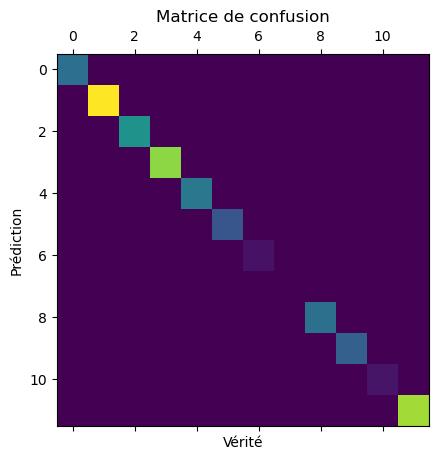

[[249   0   0   0   0   0   0   0   0   0   0   0]
 [  0 682   0   0   0   0   0   0   0   0   0   0]
 [  0   0 348   0   0   0   0   0   0   0   0   0]
 [  0   0   0 566   0   0   0   0   0   0   0   0]
 [  0   0   0   0 272   0   0   0   0   0   0   0]
 [  0   0   0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0   0   0  33   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0 253   0   0   0]
 [  0   0   0   0   0   0   0   0   0 210   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38   0]
 [  0   0   0   0   0   0   0   0   0   0   0 587]]


In [143]:
#Importer bibliothèque matplotlib.yplot pour créer des graphiques
#Importer fonction confusion_matrix pour construire la matrice de confusion
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Données réelles
y_true = rf.predict(X_Test)

# Prédictions du modèle
y_pred = rf.predict(X_Test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage de la matrice de confusion
plt.matshow(cm)
plt.title("Matrice de confusion")
plt.xlabel("Vérité")
plt.ylabel("Prédiction")
plt.show()

import numpy as np
from sklearn.metrics import confusion_matrix

# Données réelles
y_true = rf.predict(X_Test)

# Prédictions du modèle
y_pred = rf.predict(X_Test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage de la matrice de confusion
print(cm)




In [165]:
#
#Matrice 2D conetenant des caractérisitiques
new_data = [[180, 80, 50, 50, 50, 50, 50, 50, 50]]

#Stocker les prédictions dans la variable "predictions"
#Analyser le poste revenant le plus fréquemment en fonction des caractéristiques
predictions = rf.predict(new_data)

#Affichage du poste revenant le plus fréquemment
print(predictions)


['CM']


In [146]:
#Création du modèle Decision Tree
#Nombre maximum de variable
#Profondeur maximale de l'arbre de décision
from sklearn.tree  import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_features = 39,max_depth = 10)

In [147]:
dt.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=10, max_features=39)

In [148]:
#Score Accuracy (Training)
dt.score(X_Train, Y_Train)

0.6626233101936426

In [149]:
#Score Accuracy (Test)
dt.score(X_Test, Y_Test)

0.5362361192285213

In [151]:
#Création du modèle K-Nearest Neighbor
#Nombre de voisins les plus proches à considérer (Ici : 8 Voisins)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)

In [152]:
knn.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=8)

In [153]:
#Score Accuracy (Training)
knn.score(X_Train, Y_Train)

0.6604311289733285

In [154]:
#Score Accuracy (Test)
knn.score(X_Test, Y_Test)

0.5496785505552308